# DSL Project

### Data Preparation

First we will import all the necessary libraries for our project

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLarsIC
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

We load both the dataset, development and evaluation set, with the appropriate function of pandas that transforms files csv in dataframes.

In [3]:
df_dev = pd.read_csv("dataset/development.csv")
df_eval = pd.read_csv("dataset/evaluation.csv")

df_dev.shape, df_eval.shape

((385500, 92), (128500, 91))

We check the name of the features of our dataset. Note that the features are the same in both datasets except for "x" and "y" (i.e., the first 2 columns)

In [4]:
df_dev.columns

Index(['x', 'y', 'pmax[0]', 'negpmax[0]', 'area[0]', 'tmax[0]', 'rms[0]',
       'pmax[1]', 'negpmax[1]', 'area[1]', 'tmax[1]', 'rms[1]', 'pmax[2]',
       'negpmax[2]', 'area[2]', 'tmax[2]', 'rms[2]', 'pmax[3]', 'negpmax[3]',
       'area[3]', 'tmax[3]', 'rms[3]', 'pmax[4]', 'negpmax[4]', 'area[4]',
       'tmax[4]', 'rms[4]', 'pmax[5]', 'negpmax[5]', 'area[5]', 'tmax[5]',
       'rms[5]', 'pmax[6]', 'negpmax[6]', 'area[6]', 'tmax[6]', 'rms[6]',
       'pmax[7]', 'negpmax[7]', 'area[7]', 'tmax[7]', 'rms[7]', 'pmax[8]',
       'negpmax[8]', 'area[8]', 'tmax[8]', 'rms[8]', 'pmax[9]', 'negpmax[9]',
       'area[9]', 'tmax[9]', 'rms[9]', 'pmax[10]', 'negpmax[10]', 'area[10]',
       'tmax[10]', 'rms[10]', 'pmax[11]', 'negpmax[11]', 'area[11]',
       'tmax[11]', 'rms[11]', 'pmax[12]', 'negpmax[12]', 'area[12]',
       'tmax[12]', 'rms[12]', 'pmax[13]', 'negpmax[13]', 'area[13]',
       'tmax[13]', 'rms[13]', 'pmax[14]', 'negpmax[14]', 'area[14]',
       'tmax[14]', 'rms[14]', 'pmax[15]', 

Now we check the dataset if there is any missing values.

In [5]:
df_dev.isna().any(axis=0)

x              False
y              False
pmax[0]        False
negpmax[0]     False
area[0]        False
               ...  
pmax[17]       False
negpmax[17]    False
area[17]       False
tmax[17]       False
rms[17]        False
Length: 92, dtype: bool

In [6]:
df_eval.isna().any(axis=0)

Id             False
pmax[0]        False
negpmax[0]     False
area[0]        False
tmax[0]        False
               ...  
pmax[17]       False
negpmax[17]    False
area[17]       False
tmax[17]       False
rms[17]        False
Length: 91, dtype: bool

We checked NaN values and from the result we can see that there are no missing values in given datasets. Then we divide the features in categories for a better exploration.

In [7]:
positive_peak_features = ['pmax[0]', 'pmax[1]', 'pmax[2]', 'pmax[3]', 'pmax[4]', 'pmax[5]', 'pmax[6]', 'pmax[7]', 'pmax[8]', 'pmax[9]', 'pmax[10]', 'pmax[11]', 
                          'pmax[12]', 'pmax[13]', 'pmax[14]', 'pmax[15]', 'pmax[16]', 'pmax[17]']

negative_peak_features = ['negpmax[0]', 'negpmax[1]', 'negpmax[2]', 'negpmax[3]', 'negpmax[4]', 'negpmax[5]', 'negpmax[6]', 'negpmax[7]', 'negpmax[8]', 'negpmax[9]', 'negpmax[10]', 'negpmax[11]', 
                          'negpmax[12]', 'negpmax[13]', 'negpmax[14]', 'negpmax[15]', 'negpmax[16]', 'negpmax[17]']

delay_features = ['tmax[0]', 'tmax[1]', 'tmax[2]', 'tmax[3]', 'tmax[4]', 'tmax[5]', 'tmax[6]', 'tmax[7]', 'tmax[8]','tmax[9]', 'tmax[10]', 'tmax[11]', 
                  'tmax[12]', 'tmax[13]', 'tmax[14]', 'tmax[15]', 'tmax[16]', 'tmax[17]']

area_features = ['area[0]', 'area[1]', 'area[2]', 'area[3]', 'area[4]', 'area[5]', 'area[6]', 'area[7]', 'area[8]', 'area[9]', 'area[10]', 'area[11]',
                 'area[12]', 'area[13]', 'area[14]', 'area[15]', 'area[16]', 'area[17]']

rms_features = ['rms[0]', 'rms[1]', 'rms[2]', 'rms[3]', 'rms[4]', 'rms[5]', 'rms[6]', 'rms[7]', 'rms[8]', 'rms[9]', 'rms[10]', 'rms[11]', 
                'rms[12]', 'rms[13]', 'rms[14]', 'rms[15]', 'rms[16]', 'rms[17]']

### Data Cleaninng

In this section we use command ".describe()" to have an overview on each column of the categories found before. From previous observations we saw that there are no missing values, however there can be outliers. From the project description we know that there are 18 readings for each feature, whereas only 12 pads are present. So in this section we will find 6 noise pads for each type of features.

MAGNITUDE OF THE POSITIVE PEAK FEATURES

In [9]:
df_dev[positive_peak_features].describe([.01, .25, .5, .75, .99])

,pmax[0],pmax[1],pmax[2],pmax[3],pmax[4],pmax[5],pmax[6],pmax[7],pmax[8],pmax[9],pmax[10],pmax[11],pmax[12],pmax[13],pmax[14],pmax[15],pmax[16],pmax[17]
count,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000
mean,4.866423,16.510543,8.784017,26.457888,14.947826,39.333002,14.907669,4.849883,20.503279,12.505530,37.827489,22.118955,4.872721,41.233983,16.656853,104.181567,608.650804,609.060121
std,1.481220,16.781018,7.692692,25.397517,13.394484,27.899214,16.613431,1.487651,20.175681,13.862611,30.010446,21.599092,1.748889,27.992784,17.784631,16.031714,13.723698,13.928735
min,1.394440,2.028134,1.799435,2.034311,1.940271,2.476239,1.883002,1.591489,1.440403,1.727530,2.533267,1.935126,1.619556,2.727048,1.801639,49.502625,451.502789,456.816620
1%,2.947039,3.432467,3.193957,4.004031,3.500043,6.574091,3.432620,2.918794,3.506769,3.225075,5.473966,3.786147,2.892501,7.809210,3.496161,64.703726,583.525415,582.705838
25%,4.123941,5.619728,4.681271,9.327397,5.744334,15.949420,5.402504,4.106779,6.471845,4.919528,13.758305,7.904691,4.045327,17.327409,5.720558,94.907836,598.888989,599.390156
50%,4.668321,10.068513,5.714713,15.071468,10.180335,28.257567,8.674725,4.649773,12.660268,6.996239,23.506975,13.388216,4.576996,33.571727,10.125145,102.724738,607.190645,607.202368
75%,5.265888,19.031319,9.796498,36.166834,17.985703,58.928515,16.197600,5.249033,25.451260,13.679469,59.207650,26.453506,5.171157,60.328537,18.720630,113.354999,616.837596,617.313303
99%,13.237138,78.574631,44.330204,105.423612,63.323187,111.794062,84.954915,13.255265,90.952839,72.820943,116.489438,96.369558,13.890102,113.723231,85.046465,147.591512,645.558909,648.224173
max,20.515415,106.649066,68.837366,136.658588,90.635233,138.381650,128.199008,19.777481,128.185635,115.566028,141.439844,134.464426,20.501949,141.530914,115.792004,193.724947,665.267443,675.052221


From previous observations, we know that there are no missing values. So we try to find 6 outliers by drawing some plots.

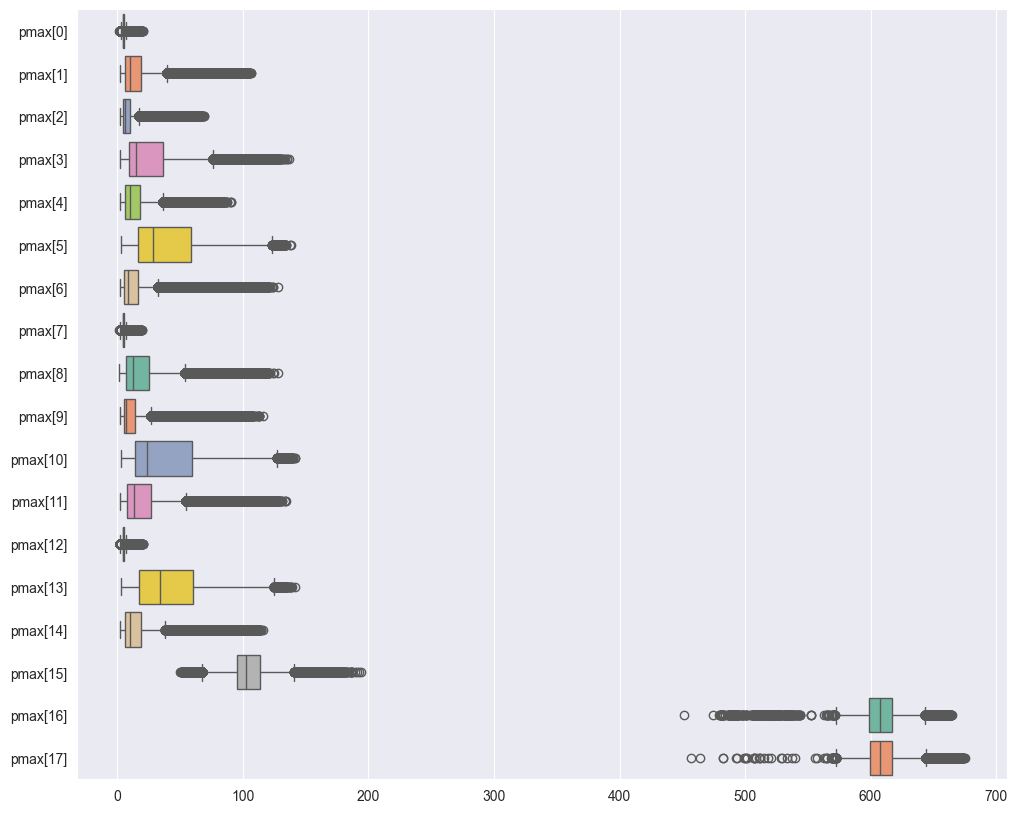

In [10]:
data = df_dev[positive_peak_features]
#boxplot
plt.figure(figsize=(12, 10))
sns.boxplot(data=data, orient="h", palette="Set2")
plt.show()

From the boxplot above, "pmax[0]", "pmax[7]", "pmax[12]", "pmax[15]", "pmax[16]" and "pmax[17]" features can be considered as outliers by their distribution. We check other group of features also to know if these order of features are distributed as outliers also. 

THE MAGNITUDE OF THE NEGATIVE PEAK OF THE SIGNAL

In [11]:
df_dev[negative_peak_features].describe([.01, .25, .5, .75, .99])

,negpmax[0],negpmax[1],negpmax[2],negpmax[3],negpmax[4],negpmax[5],negpmax[6],negpmax[7],negpmax[8],negpmax[9],negpmax[10],negpmax[11],negpmax[12],negpmax[13],negpmax[14],negpmax[15],negpmax[16],negpmax[17]
count,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000
mean,-5.046162,-9.187917,-5.596777,-13.964902,-8.454200,-20.186649,-8.814084,-5.309727,-12.218777,-8.171642,-21.218853,-12.597360,-5.641027,-22.280679,-9.865294,-5.237765,-42.152047,-46.921923
std,15.877804,29.955290,173.289844,68.418678,115.439999,17.294225,26.239272,106.865747,184.963808,73.012116,124.881360,101.812968,120.887383,35.573168,152.735946,150.181112,3.158175,3.478838
min,-7741.109923,-9930.114637,-10777.684263,-25502.557774,-42648.221376,-2135.126117,-10967.680437,-63107.687949,-86543.677185,-30718.927252,-57175.301549,-48053.652150,-48301.216027,-14186.920829,-39039.394697,-52095.638075,-51.840704,-57.876959
1%,-19.010591,-46.605796,-23.801915,-63.243731,-35.724971,-65.719693,-53.685734,-18.362478,-58.027072,-45.483166,-71.833396,-59.940826,-18.884905,-69.708361,-52.951606,-18.863995,-48.212705,-53.664063
25%,-5.257178,-8.114323,-5.674350,-17.757946,-7.387660,-31.219964,-6.977056,-5.323495,-12.788780,-6.429401,-33.188326,-13.619740,-5.367604,-33.413062,-8.207006,-5.421191,-44.601152,-49.596344
50%,-4.646420,-5.229009,-4.873082,-6.060133,-5.324010,-12.875058,-5.244839,-4.704361,-5.826880,-5.184883,-10.563461,-6.086896,-4.759961,-16.318930,-5.650892,-4.794499,-42.360754,-47.147636
75%,-4.093211,-4.387686,-4.245788,-4.680508,-4.506516,-6.209676,-4.469461,-4.144341,-4.782032,-4.470182,-5.726617,-4.919308,-4.209424,-7.224182,-4.799372,-4.230095,-39.833169,-44.375652
99%,-2.863314,-2.976482,-2.951281,-3.088003,-3.085552,-3.530529,-3.083853,-2.918164,-3.268231,-3.113055,-3.557714,-3.335035,-2.983437,-3.810685,-3.326185,-2.976986,-34.720446,-39.030560
max,-0.745816,-1.054508,74827.377234,-1.156628,-0.876505,-1.237840,-0.875259,-1.206569,-0.010708,-0.771518,-1.296677,-0.676910,118.131840,-1.340251,74812.277374,74827.647707,-29.085419,-29.592059


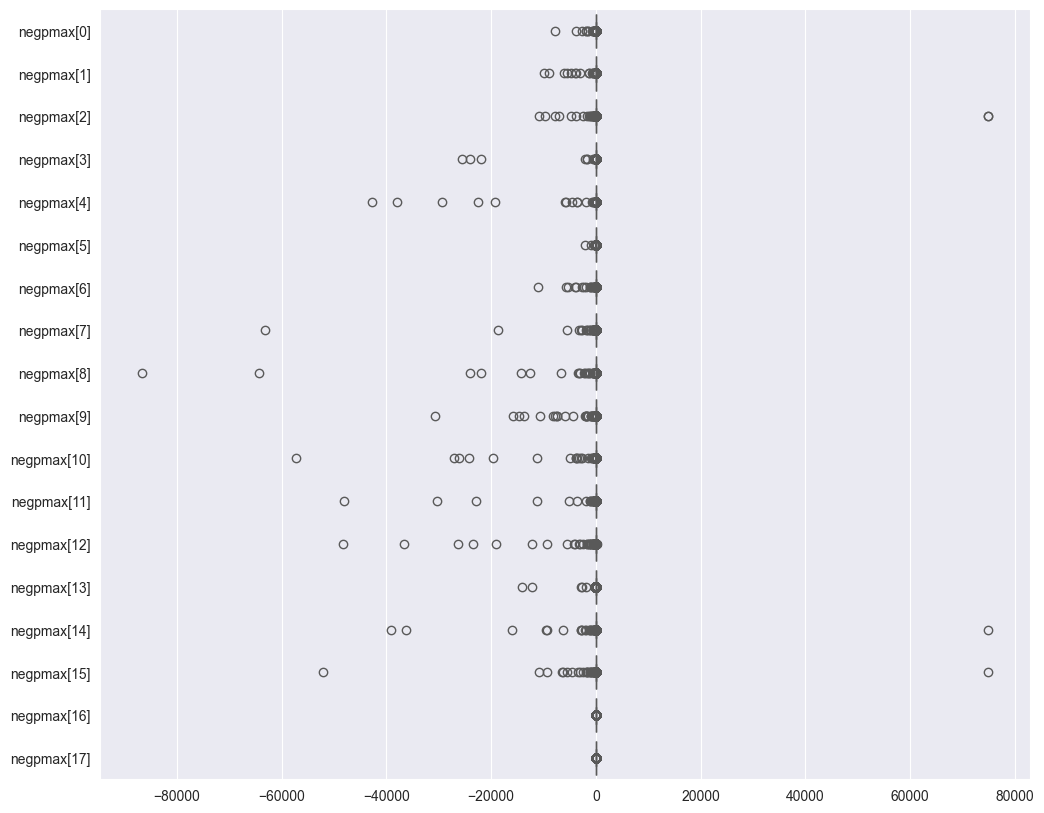

In [12]:
df_dev[negative_peak_features].describe([.01, .25, .5, .75, .99])
data = df_dev[negative_peak_features]
#boxplot
plt.figure(figsize=(12, 10))
sns.boxplot(data=data, orient="h", palette="Set2")
plt.show()

TIME DELAY FEATURES

In [13]:
df_dev[delay_features].describe([.01, .25, .5, .75, .99])

,tmax[0],tmax[1],tmax[2],tmax[3],tmax[4],tmax[5],tmax[6],tmax[7],tmax[8],tmax[9],tmax[10],tmax[11],tmax[12],tmax[13],tmax[14],tmax[15],tmax[16],tmax[17]
count,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000
mean,97.593811,77.383326,84.221963,72.975241,77.332988,71.544003,78.324800,97.900006,75.949070,80.758572,71.874087,74.250317,97.552845,71.709501,77.455162,71.888650,71.628631,71.695363
std,59.444364,30.102913,43.514353,14.680792,29.896806,4.008432,32.690131,59.795323,26.313640,37.492926,6.938057,20.631776,60.045805,2.964976,30.938912,0.598055,0.577619,0.585629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.400000,70.420683,70.423425
1%,1.400000,8.200000,3.000000,38.000000,8.200000,70.400000,6.400000,1.400000,8.600000,3.600000,70.400000,17.000000,1.200000,70.600000,6.000000,70.785245,70.608735,70.632957
25%,46.400000,71.200000,71.000000,71.060475,71.000000,71.000000,70.800000,46.081232,71.200000,71.000000,71.000000,71.000000,46.800000,71.200000,70.800000,71.408303,71.144733,71.200245
50%,90.600000,71.800000,71.992175,71.600000,71.600000,71.400000,71.400000,91.600000,71.800000,71.800000,71.600000,71.600000,92.321804,71.600000,71.400000,71.871424,71.627565,71.681603
75%,151.026985,72.400000,86.400000,72.200000,72.222858,72.000000,72.043500,151.800000,72.400000,72.600000,72.000000,72.200000,149.400000,72.200000,72.200000,72.403153,72.134776,72.194196
99%,201.800000,194.600000,199.828885,163.000000,194.517329,72.600000,195.800000,202.000000,193.350971,198.800000,72.800000,185.400000,201.933480,72.800000,196.200000,73.035472,72.650147,72.790069
max,204.600000,204.600000,204.600000,204.600000,204.600000,204.600000,204.600000,204.600000,204.600000,204.600000,204.600000,204.600000,204.600000,204.000000,204.600000,73.426615,72.856918,73.031394


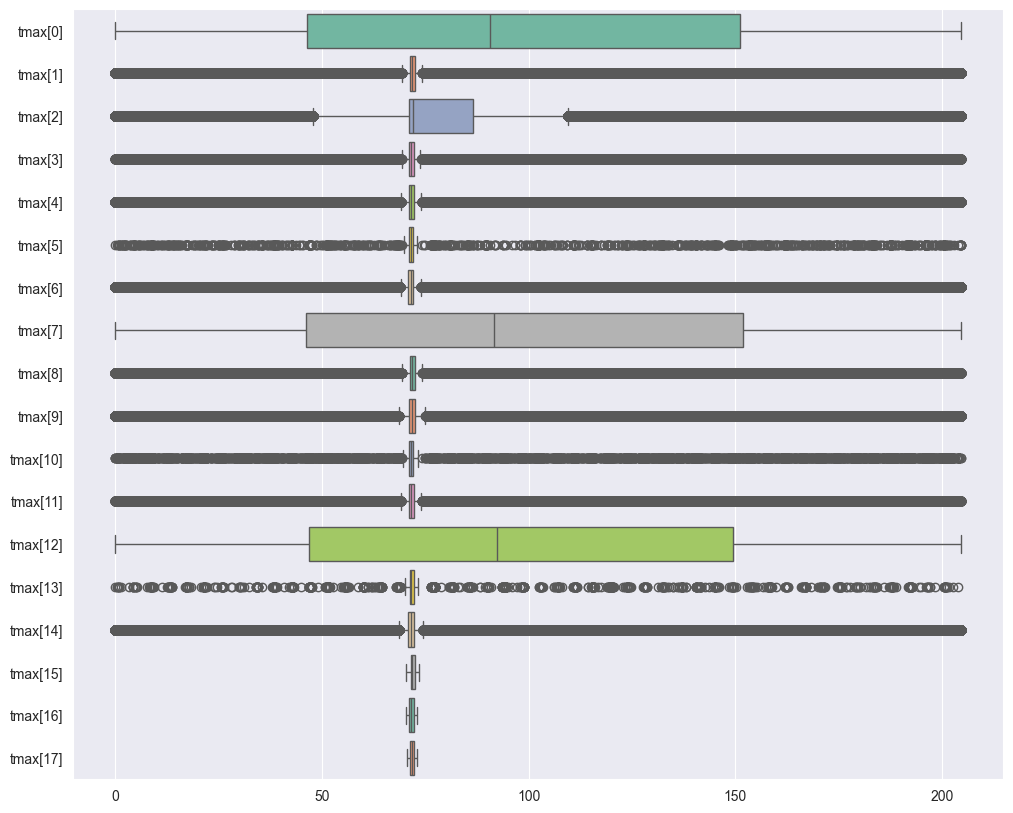

In [14]:
data = df_dev[delay_features]
#boxplot
plt.figure(figsize=(12, 10))
sns.boxplot(data=data, orient="h", palette="Set2")
plt.show()

AREA FEATURES

In [15]:
df_dev[area_features].describe([.01, .25, .5, .75, .99])

,area[0],area[1],area[2],area[3],area[4],area[5],area[6],area[7],area[8],area[9],area[10],area[11],area[12],area[13],area[14],area[15],area[16],area[17]
count,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000
mean,4.330495,10.504198,6.288025,15.282057,9.521325,21.714331,9.296706,4.236358,11.857352,7.843535,20.479499,12.735731,3.818860,22.437697,9.924054,148.851283,583.569358,583.060292
std,3.489414,8.444105,4.758113,12.079510,6.923761,13.035837,8.253096,3.277200,9.633506,6.940520,13.938797,10.309472,2.865206,13.082657,8.719940,15.418415,6.646175,6.992203
min,-0.582573,-0.997301,-1.735430,-0.465472,-0.498636,-0.286943,-1.575635,-1.572485,-1.242195,-2.207168,0.270239,-0.851041,-2.003115,1.107431,-1.937842,78.864384,516.386725,513.760083
1%,1.042595,1.510269,1.227532,2.190810,1.537353,4.537987,1.462927,1.063854,1.576233,1.296649,3.558342,1.782842,0.967715,4.957637,1.465155,99.380017,569.094722,566.323062
25%,2.383830,4.755876,3.116460,6.900497,4.703120,10.925126,4.133098,2.407937,5.283902,3.462256,9.262448,5.806451,2.184890,11.582386,4.301519,143.915560,579.190080,578.269642
50%,3.361071,7.886552,4.944174,10.510014,7.580626,17.630692,6.787136,3.338088,8.622237,5.753338,14.784152,9.013587,3.021165,19.268355,7.185239,151.382190,583.512671,583.401620
75%,5.104368,12.945553,7.888534,20.451969,12.014731,30.914978,10.984367,4.972504,14.814062,9.392292,30.412825,15.834880,4.489807,31.428853,11.774312,157.704138,587.982952,587.877953
99%,17.760125,39.643317,24.619832,51.437515,32.693227,54.485526,42.118725,16.721545,44.403150,35.959509,56.179403,47.068255,14.634962,55.450961,42.091527,179.040398,599.103936,598.496779
max,149.589043,152.517700,136.872156,217.158246,104.968125,137.897479,117.330137,144.933251,148.486123,96.623736,96.005894,95.228001,193.390146,120.175974,97.635488,410.492941,614.884980,619.099952


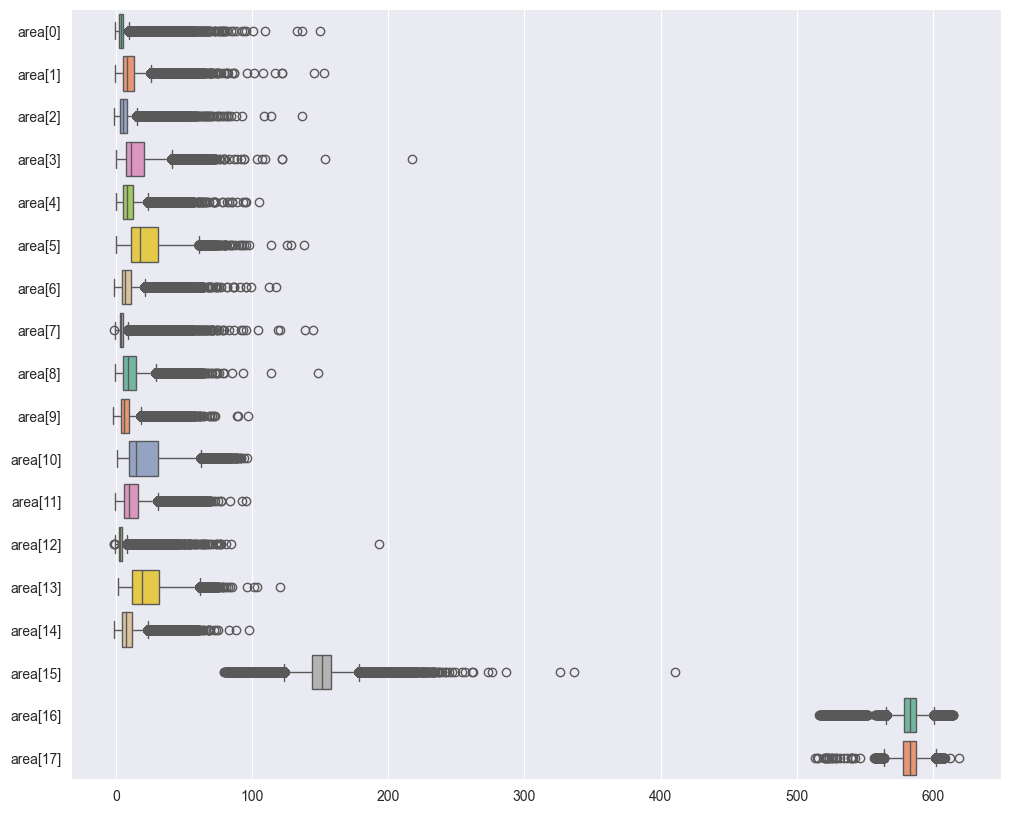

In [16]:
data = df_dev[area_features]
#boxplot
plt.figure(figsize=(12, 10))
sns.boxplot(data=data, orient="h", palette="Set2")
plt.show()

RMS FEATURES

In [17]:
df_dev[rms_features].describe([.01, .25, .5, .75, .99])

,rms[0],rms[1],rms[2],rms[3],rms[4],rms[5],rms[6],rms[7],rms[8],rms[9],rms[10],rms[11],rms[12],rms[13],rms[14],rms[15],rms[16],rms[17]
count,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000
mean,1.340462,1.335660,1.356628,1.325691,1.375895,1.363732,1.371803,1.346945,1.389921,1.377497,1.408877,1.415314,1.364507,1.411607,1.439037,1.370949,0.452944,0.371027
std,0.342167,0.340729,0.346268,0.338356,0.352680,0.352439,0.352000,0.352530,0.353814,0.349208,0.355428,0.356551,0.342913,0.358423,0.366330,0.350003,0.299456,0.081983
min,0.275854,0.314711,0.254500,0.283914,0.317826,0.270687,0.316127,0.239211,0.319754,0.294681,0.324462,0.312743,0.256888,0.327664,0.318347,0.302089,0.129428,0.102138
1%,0.660293,0.659481,0.665575,0.652274,0.675340,0.665298,0.670180,0.646696,0.686217,0.683690,0.701309,0.704833,0.681012,0.698420,0.710442,0.676363,0.228645,0.223722
25%,1.096611,1.092676,1.109390,1.084392,1.123985,1.112065,1.120746,1.095444,1.138205,1.129018,1.155453,1.161411,1.120670,1.156713,1.178395,1.120797,0.342264,0.321753
50%,1.316209,1.311898,1.333165,1.301515,1.350173,1.338970,1.347503,1.321517,1.365886,1.353291,1.383982,1.391340,1.341183,1.386532,1.414197,1.346501,0.400117,0.366981
75%,1.557156,1.552595,1.577739,1.541693,1.601313,1.588144,1.596552,1.571322,1.614668,1.598699,1.635779,1.643028,1.582718,1.640055,1.672101,1.594086,0.466077,0.415578
99%,2.231328,2.216899,2.254158,2.204150,2.292186,2.279776,2.283141,2.264767,2.303261,2.283430,2.327520,2.337743,2.251219,2.343096,2.388442,2.279720,2.361793,0.550231
max,6.088277,5.860626,5.195023,5.550556,6.038189,5.669777,5.463565,5.872917,6.390013,5.982645,6.006217,5.988877,6.379770,6.283808,6.007198,5.859994,5.031400,4.925181


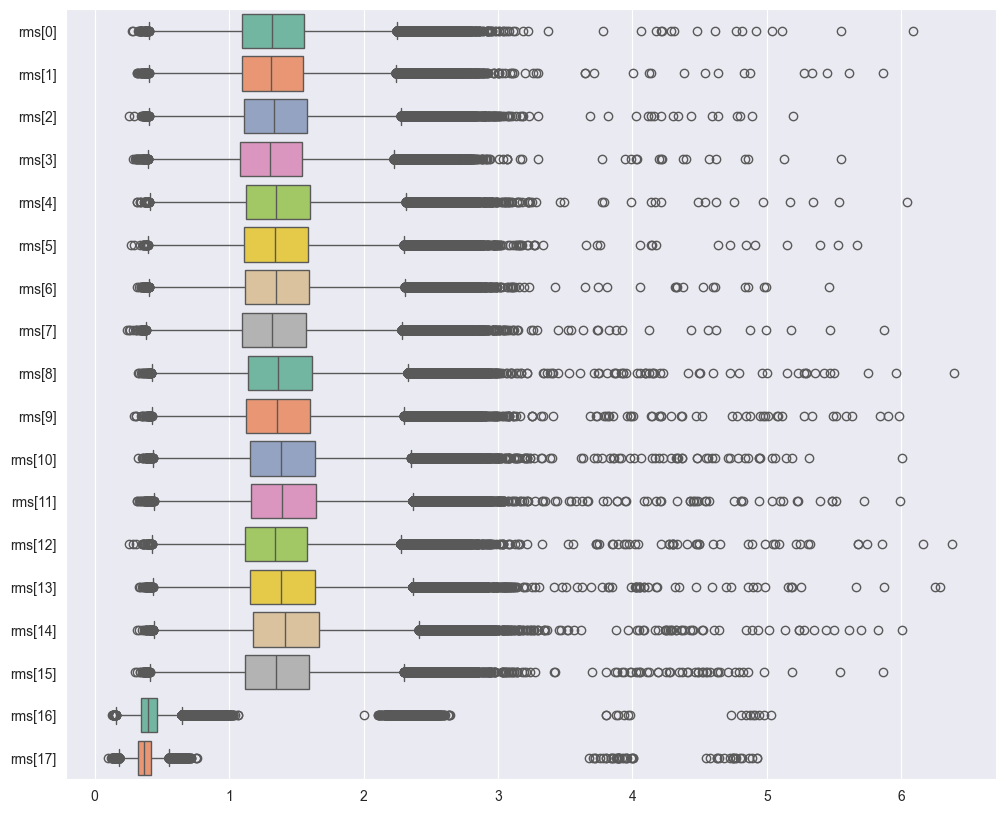

In [18]:
data = df_dev[rms_features]
#boxplot
plt.figure(figsize=(12, 10))
sns.boxplot(data=data, orient="h", palette="Set2")
plt.show()

We can see same outliers in the majority group of features. So it is better to gid rid of them by removing for both development and evalutions sets.

In [19]:
noise_features = ['pmax[0]', 'negpmax[0]', 'tmax[0]', 'area[0]', 'rms[0]',
                     'pmax[7]', 'negpmax[7]', 'tmax[7]', 'area[7]', 'rms[7]',
                     'pmax[12]', 'negpmax[12]', 'tmax[12]', 'area[12]', 'rms[12]',
                     'pmax[15]', 'negpmax[15]', 'tmax[15]', 'area[15]', 'rms[15]',
                     'pmax[16]', 'negpmax[16]', 'tmax[16]', 'area[16]', 'rms[16]',
                     'pmax[17]', 'negpmax[17]', 'tmax[17]', 'area[17]', 'rms[17]']
df_dev.drop(columns=noise_features, inplace=True)
df_eval.drop(columns=noise_features, inplace=True)

In [20]:
df_dev.shape, df_eval.shape

((385500, 62), (128500, 61))

Now we handle outliers by the row for the remaining features.

In [21]:
positive_peak_features = ['pmax[1]', 'pmax[2]', 'pmax[3]', 'pmax[4]', 'pmax[5]', 'pmax[6]', 'pmax[8]', 'pmax[9]', 'pmax[10]', 'pmax[11]', 'pmax[13]', 'pmax[14]']
negative_peak_features = ['negpmax[1]', 'negpmax[2]', 'negpmax[3]', 'negpmax[4]', 'negpmax[5]', 'negpmax[6]', 'negpmax[8]', 'negpmax[9]', 'negpmax[10]', 'negpmax[11]', 'negpmax[13]', 'negpmax[14]']
delay_features = ['tmax[1]', 'tmax[2]', 'tmax[3]', 'tmax[4]', 'tmax[5]', 'tmax[6]', 'tmax[8]','tmax[9]', 'tmax[10]', 'tmax[11]', 'tmax[13]', 'tmax[14]']
area_features = ['area[1]', 'area[2]', 'area[3]', 'area[4]', 'area[5]', 'area[6]', 'area[8]', 'area[9]', 'area[10]', 'area[11]', 'area[13]', 'area[14]']
rms_features = ['rms[1]', 'rms[2]', 'rms[3]', 'rms[4]', 'rms[5]', 'rms[6]', 'rms[8]', 'rms[9]', 'rms[10]', 'rms[11]', 'rms[13]', 'rms[14]']

In [22]:
for group in [positive_peak_features, negative_peak_features, delay_features, area_features, rms_features]:
    for feature in df_dev[group]:
        percentiles = df_dev[feature].quantile([0.01, 0.96]).values
        df_dev.loc[df_dev[feature] <= percentiles[0], feature] = percentiles[0]
        df_dev.loc[df_dev[feature] >= percentiles[1], feature] = percentiles[1]

### Data Preprocessing

Correlation

<Axes: >

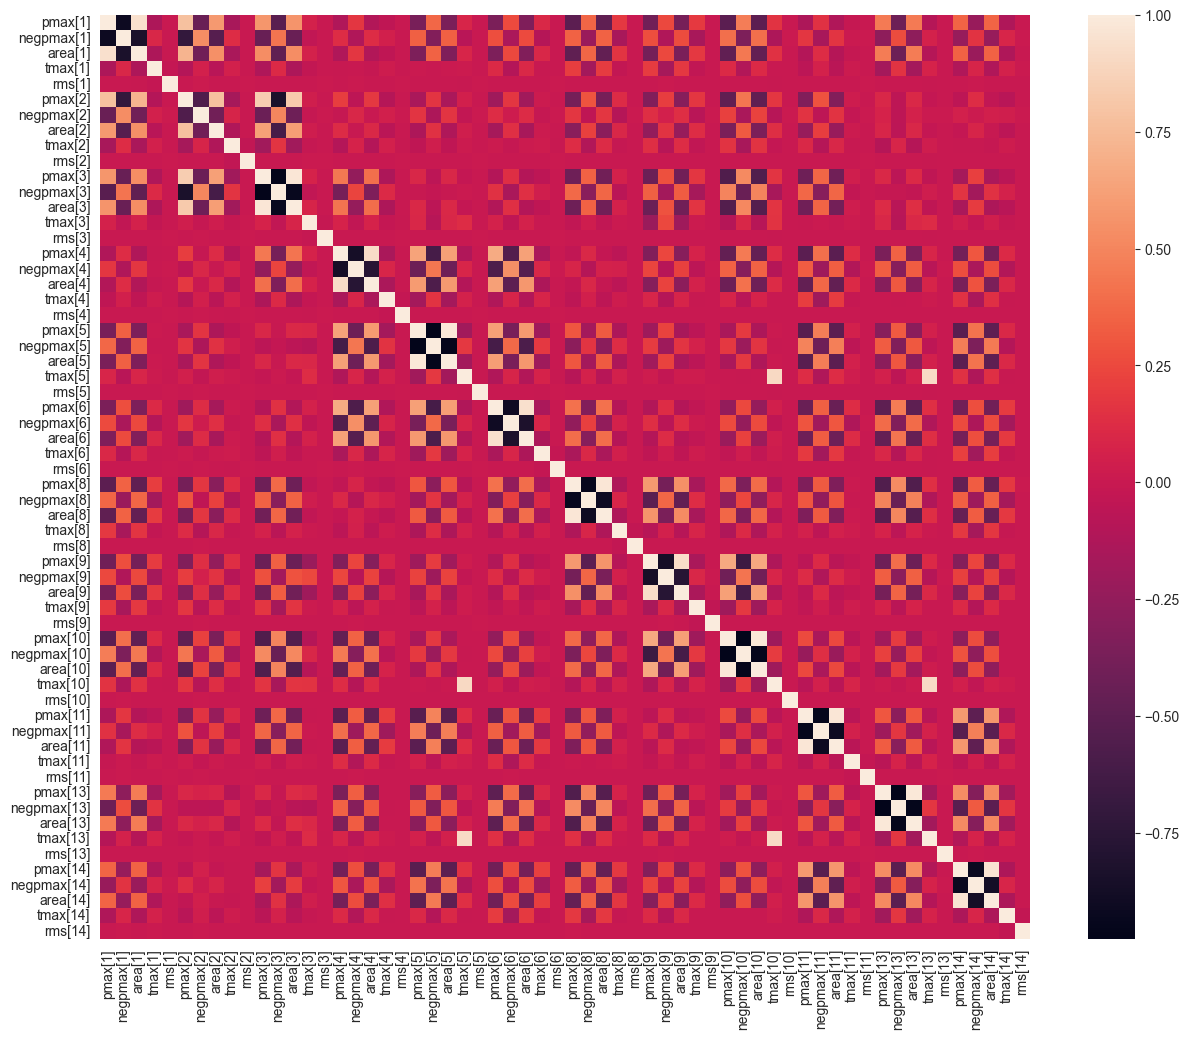

In [23]:
plt.figure(figsize=(15,12))
sns.heatmap(df_dev.drop(columns=["x", "y"]).corr())

In [24]:
corr_matrix = df_dev.drop(columns=["x", "y"]).corr(numeric_only=True).abs()
np.unique(np.round(corr_matrix.values, 2), return_counts=True)

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.61, 0.62, 0.63, 0.65, 0.66, 0.67,
        0.71, 0.72, 0.77, 0.78, 0.83, 0.84, 0.86, 0.87, 0.9 , 0.91, 0.92,
        0.94, 0.95, 0.96, 0.97, 0.98, 1.  ]),
 array([1240,  148,   72,   78,   68,   66,   92,   78,   64,   80,   92,
          68,   80,   70,   60,   40,   52,   56,   52,   38,   32,   12,
          40,   16,   18,   26,   28,   20,   16,   22,   30,   26,   32,
          24,   32,   38,   26,   22,   20,   16,   34,   14,   28,   22,
          18,   18,   14,   20,   10,   18,   16,   24,   16,   14,   10,
          12,    8,   12,   10,   10,   14,   10,    4,    2,    4

In [26]:
# correlation_matrix = df_dev.corr().abs()
# upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
# to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
# df_filtered = df_dev.drop(columns=to_drop)
# 
# # Step 2: Dimensionality Reduction (PCA)
# # Standardize the features
# scaler = StandardScaler()
# df_standardized = scaler.fit_transform(df_filtered)
# 
# # Apply PCA
# pca = PCA(n_components=0.95)  # Retain 95% of the variance
# principal_components = pca.fit_transform(df_standardized)
# df_reduced = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
# 
# # Concatenate reduced features with original dataset
# df_final = pd.concat([df_filtered, df_reduced], axis=1)

### Training of the model

Now we split the dataset and perform some model evaluation.

In [25]:
# Split the dataset into features (X) and targets (y)
X = df_dev.iloc[:, 2:]  # Assuming columns from 2 onwards are features
y = df_dev.iloc[:, :2]  # Assuming the first two columns are targets (x and y)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardization

In [26]:
std_sc = StandardScaler()
X_train = std_sc.fit_transform(X_train)
X_test = std_sc.transform(X_test)

PCA

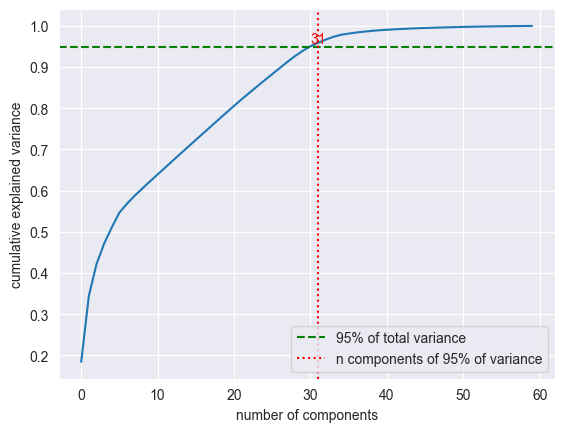

In [27]:
pca = PCA()
pca.fit(X_train)
total_variance = np.sum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.axhline(y=0.95, color='g', linestyle='--', label='95% of total variance')
plt.text(n_components_95, 0.95, str(n_components_95), color='red', ha='center', va='bottom')
plt.axvline(x=n_components_95, color='r', linestyle=':', label='n components of 95% of variance')

plt.legend()

plt.grid(True)

Now we do some basic regression models evaluation. We use Multi Output Regressor, because we need to predict two labels (x and y)

Linear Regression

In [34]:
base_regressor = LinearRegression()
regressor = MultiOutputRegressor(base_regressor)
regressor.fit(X_train, y_train)
print(root_mean_squared_error(y_test, regressor.predict(X_test)))

14.309312920000307


Linear Ridge Regression

In [37]:
base_regressor = Ridge()
regressor = MultiOutputRegressor(base_regressor)
regressor.fit(X_train, y_train)
print(root_mean_squared_error(y_test, regressor.predict(X_test)))

14.309312317733573


Linear Lasso Regression

In [38]:
base_regressor = Lasso()
regressor = MultiOutputRegressor(base_regressor)
regressor.fit(X_train, y_train)
print(root_mean_squared_error(y_test, regressor.predict(X_test)))

14.98385916211485


Random Forest

In [34]:
base_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor = MultiOutputRegressor(base_regressor)
regressor.fit(X_train, y_train)
print(root_mean_squared_error(y_test, regressor.predict(X_test)))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


4.1743136504401015

LassoLarsIC

In [35]:
base_regressor = LassoLarsIC()
regressor = MultiOutputRegressor(base_regressor)
regressor.fit(X_train, y_train)
print(root_mean_squared_error(y_test, regressor.predict(X_test)))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


14.30928437233285

Hist Gradient Boosting Regressor

In [36]:
base_regressor = HistGradientBoostingRegressor(max_iter=100, early_stopping=False, random_state=42)
regressor = MultiOutputRegressor(base_regressor)
regressor.fit(X_train, y_train)
print(root_mean_squared_error(y_test, regressor.predict(X_test)))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


6.095578600830697

### SUBMISSION CREATION

Hyperparameter tuning for HistGradientBoostingRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Define the parameter grid
param_grid = {
    'max_iter': [500, 700, 1000],
    'max_leaf_nodes': [None, 10, 20],
    'early_stopping': [True, False]
}

# Define the scoring metric (e.g., mean squared error)
scoring = 'neg_mean_squared_error'

# Create the models (HistGradientBoostingRegressor) for each output
model_output1 = HistGradientBoostingRegressor()
model_output2 = HistGradientBoostingRegressor()

# Perform grid search for output 1
grid_search_output1 = GridSearchCV(estimator=model_output1, param_grid=param_grid, scoring=scoring, cv=5)
grid_search_output1.fit(X_train, y_train.iloc[:, 0])  # Assuming y_train is a 2D array with multiple outputs

# Perform grid search for output 2
grid_search_output2 = GridSearchCV(estimator=model_output2, param_grid=param_grid, scoring=scoring, cv=5)
grid_search_output2.fit(X_train, y_train.iloc[:, 1])  # Assuming y_train is a 2D array with multiple outputs

# Access the best estimators for each output
best_estimator_output1 = grid_search_output1.best_estimator_
best_estimator_output2 = grid_search_output2.best_estimator_

best_estimator_output1, best_estimator_output2
# 
# # Make predictions using the best estimators
# y_pred_output1 = best_estimator_output1.predict(X_test)
# y_pred_output2 = best_estimator_output2.predict(X_test)

In [ ]:
base_regressor = HistGradientBoostingRegressor()
regressor = MultiOutputRegressor(base_regressor)
params = {
    "estimator": [200, 500, 1000],
}

gs = GridSearchCV(regressor, param_grid=params, scoring="neg_root_mean_squared_error")
gs.fit(X_train, y_train)
-gs.best_score_, gs.best_params_

Training and Inference

In [ ]:
gs.best_estimator_.fit(X_train, y_train)

df_evall = df_eval.copy()
df_evall.drop(columns="Id", axis=1)

y_pred = gs.best_estimator_.predict(df_evall)

formatted_predictions = ['|'.join(map(str, pred)) for pred in y_pred]


evaluation_results = pd.DataFrame({'Id': df_eval['Id'], 'Predicted': formatted_predictions})

Output

In [ ]:
evaluation_results.to_csv('dataset/result2.csv', index=False)